# 피마 인디언 데이터 분석하기: 비만은 유전일까?

## 서론

비만이 유전적인 영향과 개인의 식습관 조절 실패 사이에 어떤 관련이 있는지를 알아보기 위해, 미국 남서부에 살고 있는 피마 인디언의 데이터를 분석할 것이다. 피마 인디언은 1950년대까지 비만인 사람이 존재하지 않았던 민족으로, 그 후로 전체 부족의 60%가 당뇨, 80%가 비만으로 고통받고 있다.

## 연구 배경

피마 인디언의 비만 증가는 그들이 생존하기 위해 영양분을 효과적으로 체내에 저장하는 능력을 물려받은 인디언들이 미국의 기름진 패스트푸드 문화를 만나면서 벌어진 결과라고 할 수 있다.

## 데이터 소개

UCI 머신러닝 저장소에서 제공되는 피마 인디언을 대상으로 한 당뇨병 여부를 측정한 데이터를 사용할 것이다. 이 데이터는 당뇨 여부 및 다양한 건강 지표에 관한 정보를 포함하고 있다.  
하지만 특정 집단에 대한 데이터 공유 문제로 이번 수업은 배포된 "pima-indians-diabetes.csv" 사용 한다.

# 데이터 로드

In [16]:
import pandas as pd
df= pd.read_csv('/Users/Star1/Desktop/부트캠프_파이썬 _실습/Python_Practice/pima-indians-diabetes.csv', names = ["pregnant", "plasma" , "pressure",
"BMI", "pedigree" , "age" , "class"])
df

,,pregnant,plasma,pressure,BMI,pedigree,age,class
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0
1,126,60,0,0,30.1,0.349,47,1


read_csv() 함수로 csv 데이터를 불러왔음  
csv 파일에는 데이터를 설명하는 한 줄의 라인, 즉 헤더(header) 가  맨 처음에 나옴  
그런데 우리가 가진 csv 파일에는 헤더가 없음  
이에 names라는 함수를 통해 각 속성별 키워드를 지정해 주었음  
전체 값을 보려면  

DataFrame 에 들어있는 자료들을 확인하기 위해 맨 앞이나 뒤의 자료들 몇 개를 알아보고 싶다면 . 
head()와 .tail() 메소드를 사용. 기본적으로 상위 또는 하위 5 개의 자료를 보여주는데,  
더 적게 혹은 많이 보고 싶다면 메소드의 인자로 보고싶은 데이터의 개수를 숫자를 넣어주면 됨.

In [17]:
print(df.head(5))

       pregnant  plasma  pressure   BMI  pedigree  age  class
6 148        72      35         0  33.6     0.627   50      1
1 85         66      29         0  26.6     0.351   31      0
8 183        64       0         0  23.3     0.672   32      1
1 89         66      23        94  28.1     0.167   21      0
0 137        40      35       168  43.1     2.288   33      1


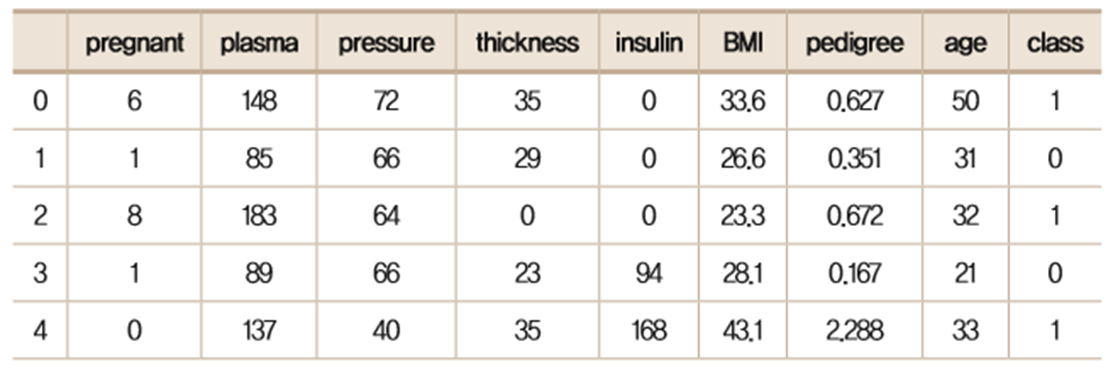

In [18]:
#data의 전반적인 정보 확인
print(df.info())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 768 entries, (6, 148) to (1, 93)
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   plasma    768 non-null    int64  
 2   pressure  768 non-null    int64  
 3   BMI       768 non-null    float64
 4   pedigree  768 non-null    float64
 5   age       768 non-null    int64  
 6   class     768 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 50.1 KB
None


In [19]:
#정보별 특징을 좀 더 자세히 알고 싶으면 describe() 함수를 이용
print(df.describe())

         pregnant      plasma    pressure         BMI    pedigree         age  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean    69.105469   20.536458   79.799479   31.992578    0.471876   33.240885   
std     19.355807   15.952218  115.244002    7.884160    0.331329   11.760232   
min      0.000000    0.000000    0.000000    0.000000    0.078000   21.000000   
25%     62.000000    0.000000    0.000000   27.300000    0.243750   24.000000   
50%     72.000000   23.000000   30.500000   32.000000    0.372500   29.000000   
75%     80.000000   32.000000  127.250000   36.600000    0.626250   41.000000   
max    122.000000   99.000000  846.000000   67.100000    2.420000   81.000000   

            class  
count  768.000000  
mean     0.348958  
std      0.476951  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000  


In [20]:
#데이터의 일부 컬럼만 보고 싶을 때, 예를 들어 임신 횟수(pregnant)와 
#당뇨병 발병 여부(class)만 확인해 보고 싶다면 다음과 같이 입력
print(df[['pregnant', 'class']])

        pregnant  class
6  148        72      1
1  85         66      0
8  183        64      1
1  89         66      0
0  137        40      1
...          ...    ...
10 101        76      0
2  122        70      0
5  121        72      0
1  126        60      1
   93         70      0

[768 rows x 2 columns]


In [21]:
#다른 속성간의 관계 확인
print( df[['pregnant','class']].groupby(['pregnant'], as_index=False).mean().sort_values(by='pregnant', ascending=True) )

    pregnant     class
0          0  0.457143
1         24  0.000000
2         30  0.500000
3         38  0.000000
4         40  1.000000
5         44  0.000000
6         46  0.000000
7         48  0.200000
8         50  0.384615
9         52  0.272727
10        54  0.181818
11        55  0.000000
12        56  0.083333
13        58  0.095238
14        60  0.189189
15        61  0.000000
16        62  0.294118
17        64  0.302326
18        65  0.142857
19        66  0.366667
20        68  0.266667
21        70  0.403509
22        72  0.363636
23        74  0.326923
24        75  0.125000
25        76  0.461538
26        78  0.377778
27        80  0.325000
28        82  0.433333
29        84  0.521739
30        85  0.500000
31        86  0.428571
32        88  0.440000
33        90  0.500000
34        92  0.375000
35        94  0.500000
36        95  0.000000
37        96  0.250000
38        98  0.666667
39       100  0.333333
40       102  1.000000
41       104  1.000000
42       10

위의 모두 세 가지 함수가 사용되었음  
groupby 함수를 사용해 ‘pregnant’ 정보를 기준으로 하는 새 그룹을 만들었음  
as_index=False는 pregnant 정보 옆에 새로운 index를 만들어 줌  
mean 함수를 사용해 평균을 구하고 sort_values 함수를 써서 pregnant 칼럼을 오름차순(ascending)으로 정리하게끔 설정  


아무리 잘 정리된 데이터 테이블이라 하여도 그래프로 표현하지 않으면 정확한 성격을 파악하기 어려움  
matplotlib는 파이썬에서 그래프를 그릴 때 가장 많이 사용되는 라이브러리


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

먼저 그래프의 크기를 결정하고  
seaborn 라이브러리 중 각 항목 간의 상관관계를 나타내 주는 heatmap 함수를 통해 그래프를 표시  
heatmap 함수는 두 항목씩 짝을 지은 뒤 각각 어떤 패턴으로 변화하는지를 관찰하는 함수  
두 항목이 전혀 다른 패턴으로 변화하고 있으면 0을,  
서로 비슷한 패턴으로 변할수록 1에 가까운 값을 출력함  

# 상관관계의 의미

## 1. 상관계수

상관계수는 등간척도 이상의 두 변수 중에서 한 변수의 변화가 다른 변수의 변화에 따라 어떤 변화가 일어나는지를 보여주는 지표이다. 이는 두 변수 간의 관계를 측정하는 데 사용된다.

## 2. 상관관계

상관관계는 한 변수의 변화에 따른 다른 변수의 변화 정도와 방향을 예측하는 분석기법이다. 두 변수 간의 상관성을 파악하여 하나의 변수가 증가하면 다른 변수도 어떤 방향으로 변화하는지를 알 수 있다.

## 3. 상관계수의 특징

- 상관계수는 변수간의 관계의 정도와 방향을 하나의 수치로 요약해 주는 지수이다.
- 상관계수는 -1.00에서 +1.00 사이의 값을 가지며, 변수와의 방향은 (-)와 (+)로 표현된다.
- 양의 상관관계일 경우에는 (+)값이 나타나고, 음의 상관관계의 경우에는 (-)값이 나타난다.
- 양의 상관관계는 한 변수가 증가함에 따라 다른 변수도 증가하는 경우를 말하며, 음의 상관관계는 한 변수가 증가함에 따라 다른 변수는 감소하는 경우를 의미한다.
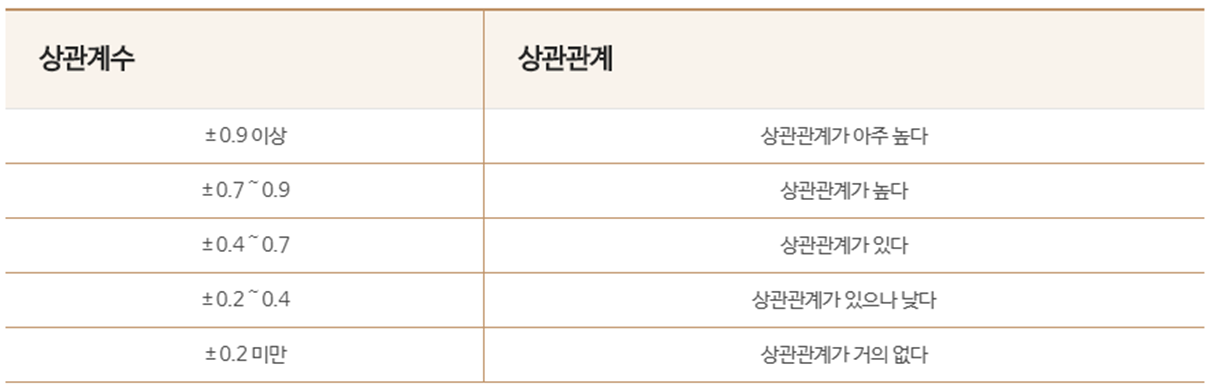

# 상관계수 확인 방법

데이터프레임(df)에서 상관계수를 확인하려면 `corr()` 메서드를 사용한다. 아래는 pandas에서 상관계수를 출력하는 예시이다.

In [22]:
#상관계수확인
print(df.corr())

          pregnant    plasma  pressure       BMI  pedigree       age     class
pregnant  1.000000  0.207371  0.088933  0.281805  0.041265  0.239528  0.065068
plasma    0.207371  1.000000  0.436783  0.392573  0.183928 -0.113970  0.074752
pressure  0.088933  0.436783  1.000000  0.197859  0.185071 -0.042163  0.130548
BMI       0.281805  0.392573  0.197859  1.000000  0.140647  0.036242  0.292695
pedigree  0.041265  0.183928  0.185071  0.140647  1.000000  0.033561  0.173844
age       0.239528 -0.113970 -0.042163  0.036242  0.033561  1.000000  0.238356
class     0.065068  0.074752  0.130548  0.292695  0.173844  0.238356  1.000000


상관계수는 -1에서 1의 값을 가지며, 크기를 나누어주어 계산되기 때문에 절대값이 1을 넘지 않는다.

상관계수 해석
일반적으로 다음과 같이 상관계수를 해석할 수 있다:

0.7보다 큰 경우: 강한 양의 상관관계가 있다.  
-0.7보다 작은 경우: 강한 음의 상관관계가 있다. (하나가 증가할 경우 다른 하나는 감소한다)  
이러한 해석을 통해 변수들 간의 강도와 방향에 대한 정보를 얻을 수 있다.

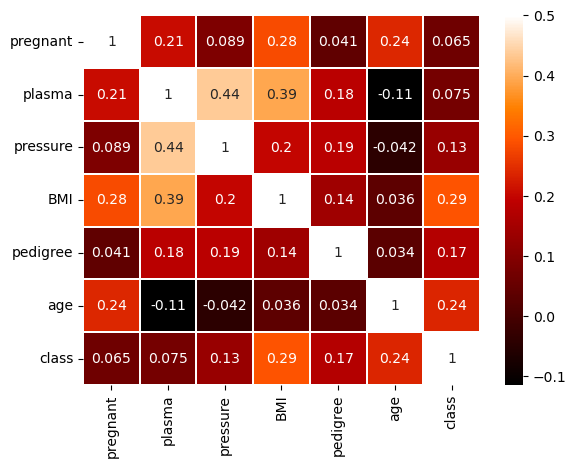

In [23]:
#상관계수 시각화
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap = plt.cm.gist_heat, linecolor="white", annot=True)
plt.show()


# 데이터의 강관관계 분석과 EDA

데이터의 간의 상관관계 분석에서 클래스와 속성 간의 상관관계가 부족한 경우, 속성들 간의 상관관계 이외의 다양한 요소를 고려하여 탐색적 데이터 분석(Exploratory Data Analysis, EDA)를 수행해야 한다.  
EDA는 수많은 데이터 속에서 특징을 찾아내는 과정으로, 상관관계 하나만으로는 부족한 정보를 얻을 수 있다.

## 부족한 상관관계 분석

데이터의 클래스와 속성 간 상관관계가 충분하지 않다면, 다양한 관점에서 데이터를 살펴보는 것이 중요하다.  
클래스와 속성 간의 강한 상관관계가 없더라도 다른 요소들이 데이터에 미치는 영향을 고려해야 한다.

## EDA를 통한 접근

1. **데이터 시각화:**
   - 속성들 간의 분포를 히스토그램, 박스 플롯 등을 통해 시각화하여 살펴본다.
   - 클래스에 따라 데이터를 색으로 구분하여 산점도를 그려 클래스 간의 패턴을 확인한다.

2. **상관관계 이외의 요소:**
   - 도메인 지식을 활용하여 중요한 속성들을 식별하고 해당 속성들 간의 관계를 조사한다.
   - 시간에 따른 변화, 지리적인 영향, 외부 환경 변수 등을 고려하여 데이터를 탐색한다.

3. **이상치 및 결측치 처리:**
   - 이상치와 결측치를 탐지하고, 이를 적절히 처리하여 데이터의 왜곡을 방지한다.

4. **변수 변환 및 파생 변수 생성:**
   - 변수를 변환하거나 새로운 파생 변수를 생성하여 데이터의 패턴을 더 잘 이해할 수 있도록 한다.

5. **통계적 분석:**
   - 다양한 통계적 분석 기법을 참고하여 데이터 간의 관계를 확인한다.

6. **머신러닝 모델 적용:**
   - 다양한 머신러닝 모델을 활용하여 예측력을 향상시키고 유의미한 특징을 발견한다.

## 결론

EDA는 단순히 상관관계를 넘어서 데이터의 복잡한 구조와 특징을 이해하는 데에 필수적인 단계이다.  
클래스와 속성 간의 상관관계가 부족하더라도, 다양한 방법을 통해 데이터를 탐색함으로써 더 나은 분석 결과를 얻을 수 있다.
